# 1) Setup

In [3]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np
import math
import scipy as sp
from scipy.stats import kstest
from copy import copy

import pymongo
from pymongo import MongoClient
from datetime import datetime
print("done")

done


In [6]:
#import functions from python files

#1) data import & filtering
from get_data import *
from filter_data import *
from select_data import *

#2) Frequentist
from Gaussian import *
from Gaussian_ml import *
from Gaussian_freq import *

from update_mean import *
from update_var import *
from Gaussian_freq_update import *

#3) Bayesian: uni-parameter
from Gaussian_bayes import *
from Gaussian_bayes_update import *

#4) Bayesian: multi-parameter
from Gamma import *
from Gaussian_broadcast import *
from Normal_Gamma import *
from Normal_Gamma_bayes import *
from Normal_Gamma_bayes_update import *

#5) Stats tests
from error_mae import *
from error_mse import *
from integrate_pdf import *

from error_ks import *                 #Kolmogorov-Smirnov
from error_ks_2samples import *
from error_cvm import *                #Cramer-von Mises
from error_cvm_2samples import *

from Gaussian_log_likelihood import *
from error_aic import *                #Akaike Information Criterion
from error_bic import *                #Bayesian Information Criterion

#6) Other distributions
from Lognormal import *


#7) Other edges
from select_data_edge import *
from underscore_prefix import *
from underscore_suffix import *

from edge_direction import *
from edge_plot import *
from edge_plot_gaussian import *
from edge_plot_lognormal import *


print("done")

done


In [10]:
#1) Import data from PyMongo
df = get_data()
#2) Preliminary filtering
df = filter_data(df)
#3) Select data of interest
df = select_data(df, wp1 = "WayPoint69", wp2 = "WayPoint70")
df.head(2)
#independent variable to plot over
t_op = df["operation_time"]

# 2) Same distributions as in MAIN2

## 2a) Gaussian Distribution

12.154848202396803 3.3790225866964683


Text(0, 0.5, 'Probability')

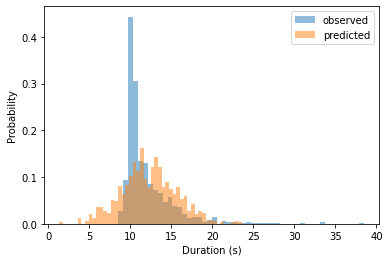

In [22]:
from scipy.stats import norm
loc, scale =norm.fit(t_op)
print(loc, scale)

t_pred = np.random.normal(loc, scale, len(t_op))
plt.hist(t_op, density = True, bins = 50, alpha = 0.5);
plt.hist(t_pred, density = True, bins = 50, alpha = 0.5);
plt.legend(["observed", "predicted"])
plt.xlabel("Duration (s)")
plt.ylabel("Probability")

0.18242343541944028


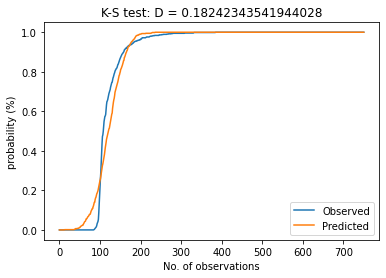

In [23]:
#K-S Test
D = error_ks_2samples(t_op, t_pred)
print(D)

3.677942060386406


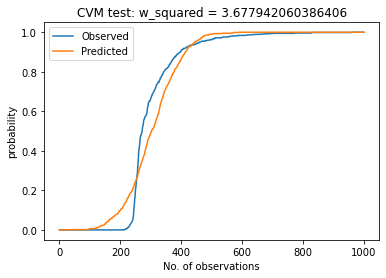

In [24]:
#CVM Test
w_squared = error_cvm_2samples(t_op, t_pred)
print(w_squared)

In [25]:
#other metrics
mae = ( 1/len(t_op) ) * np.sum( np.abs(t_op - t_pred) )
mse = ( 1/len(t_op) ) * np.sum( np.square(t_op - t_pred) )
print("MAE (s):", mae, "MSE (s):", mse)

MAE (s): 3.5222680659001004 MSE (s): 23.240689581130766


## 2b) Lognormal Distribution

1.0471314883290266 0.707732254727055 8.414285702302994


Text(0, 0.5, 'Probability')

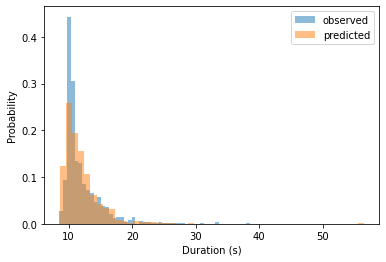

In [11]:
from scipy.stats import lognorm

#sigma = std = shape
#mu = np.log(scale)
shape, loc, scale = lognorm.fit(t_op)


mu, sigma = np.log(scale), shape
print(mu, sigma, loc)
t_pred = np.random.lognormal(mu,sigma,len(t_op)) + loc
plt.hist(t_op, density = True, bins = 50, alpha = 0.5);
plt.hist(t_pred, density = True, bins = 50, alpha = 0.5);
plt.legend(["observed", "predicted"])
plt.xlabel("Duration (s)")
plt.ylabel("Probability")

0.07856191744340851


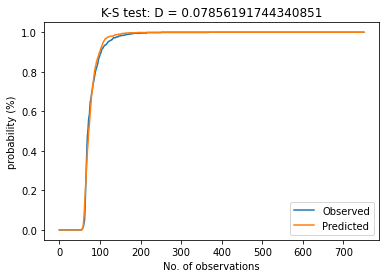

In [12]:
#K-S Test on Lognormal model
D = error_ks_2samples(t_op, t_pred)
print(D)

0.368074885651296


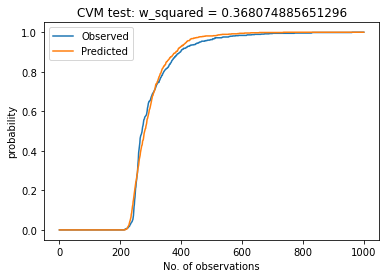

In [13]:
#CVM Test on lognormal model
w_squared = error_cvm_2samples(t_op, t_pred)
print(w_squared)

In [14]:
#other metrics
mae = ( 1/len(t_op) ) * np.sum( np.abs(t_op - t_pred) )
mse = ( 1/len(t_op) ) * np.sum( np.square(t_op - t_pred) )
print("MAE (s):", mae, "MSE (s):", mse)

MAE (s): 2.772248406556517 MSE (s): 20.12144147941456


## 2c) Gamma Distribution

1.8084198605470305 8.547755214570397 1.9945958108131443


Text(0, 0.5, 'Probability')

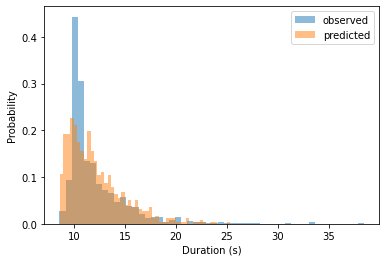

In [15]:
from scipy.stats import gamma
alpha, loc, beta=gamma.fit(t_op)
print(alpha, loc, beta)

t_pred = np.random.gamma(alpha,beta,len(t_op)) + loc
plt.hist(t_op, density = True, bins = 50, alpha = 0.5);
plt.hist(t_pred, density = True, bins = 50, alpha = 0.5);
plt.legend(["observed", "predicted"])
plt.xlabel("Duration (s)")
plt.ylabel("Probability")

0.11451398135818847


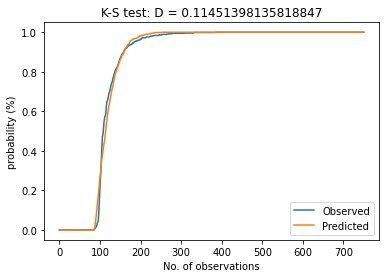

In [16]:
#K-S Test on Gamma model
D = error_ks_2samples(t_op, t_pred)
print(D)

0.6932877778585439


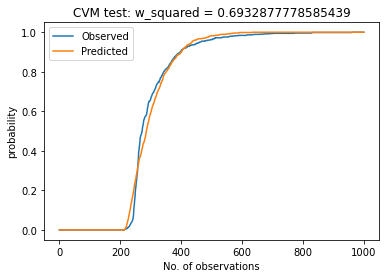

In [17]:
#CVM Test on Gamma model
w_squared = error_cvm_2samples(t_op, t_pred)
print(w_squared)

In [18]:
#other metrics
mae = ( 1/len(t_op) ) * np.sum( np.abs(t_op - t_pred) )
mse = ( 1/len(t_op) ) * np.sum( np.square(t_op - t_pred) )
print("MAE (s):", mae, "MSE (s):", mse)

MAE (s): 3.046949281218778 MSE (s): 19.16632975694029


# 3) More Distributions